In [2]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression

#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)


In [3]:
# データフレーム読み込み
girls_frame = pd.read_clipboard()

# 出会いの値を置換
girls_frame = girls_frame.replace(['東カレ','ティンダー','ナンパ','ノーマル','就活'],['tokyo_calender','tinder','nanpa','normal','normal'])
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal


In [4]:
# 普通の出会いかそれ以外かを選別する関数
def app_or_normal(value):
    if value is 'normal':
        return 1
    else:
        return 0

In [5]:
# ノーマルな出会いと不純な出会いを選別するカラムを追加
girls_frame['app_or_normal'] = girls_frame.encounter.apply(app_or_normal)
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0


In [6]:
def scale_change(value):
    return 10*((value - 40)/(70 - 43))

In [7]:
# 顔面偏差値をスケーリング
girls_frame['face_rate_'] = girls_frame.face_rate.apply(scale_change)
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0,9.259259


In [8]:
# 顔面偏差値、ステータスなどの特徴を合わせたカラムを作成
girls_frame['face+status'] = girls_frame['face_rate_']+girls_frame['status']
girls_frame['face+status+inde'] = girls_frame['face+status']+2*girls_frame['independence']
girls_frame['face+edu'] = girls_frame['face_rate_']+girls_frame['educational_rate']
girls_frame['face+edu+inde'] = girls_frame['face+edu'] + 2*girls_frame['independence']

In [9]:
girls_frame['gain_score'] = girls_frame['success'] - girls_frame['wanted']

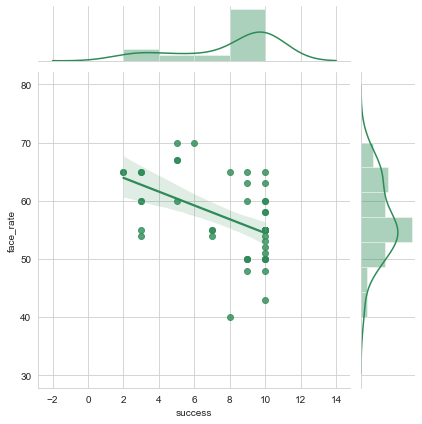

In [10]:
sns.jointplot('success','face_rate',girls_frame,kind='reg',color='seagreen')

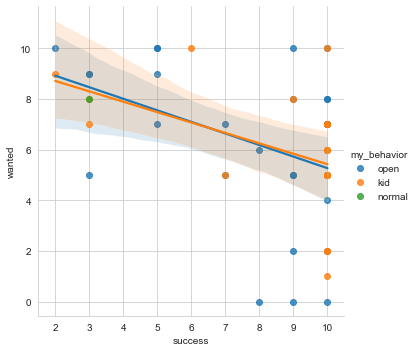

In [11]:
fig = sns.lmplot(data=girls_frame,
                   x='success',y='wanted',hue='my_behavior')

fig.savefig('fig2.png')
# アプリじゃない時は相関が弱い(デートに行ける時点で勝ち確)

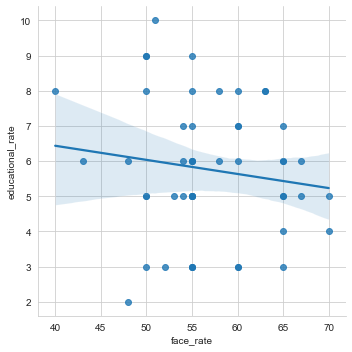

In [12]:
sns.lmplot(data=girls_frame,
                   x='face_rate',y='educational_rate')

# 顔と学歴の相関

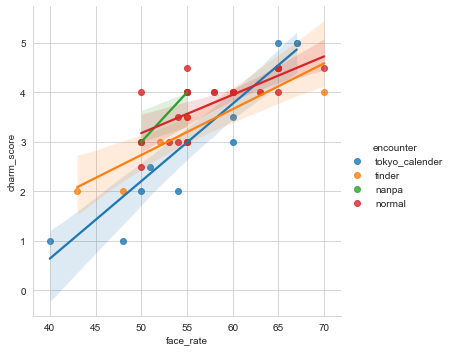

In [13]:
sns.lmplot(data=girls_frame,
                   x='face_rate',y='charm_score',hue='encounter')

fig.savefig('fig.png')
# アプリの時は強い相関
# アプリの時はその人の中身を「魅力」として加味しておらず、顔面偏差値（見た目:服装なども含む）が魅力に直結する

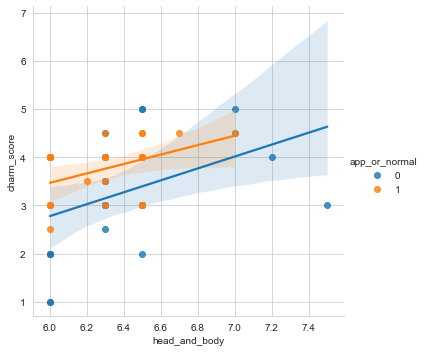

In [14]:
sns.lmplot(data=girls_frame,
                   x='head_and_body',y='charm_score',hue='app_or_normal')

#スタイルと魅力

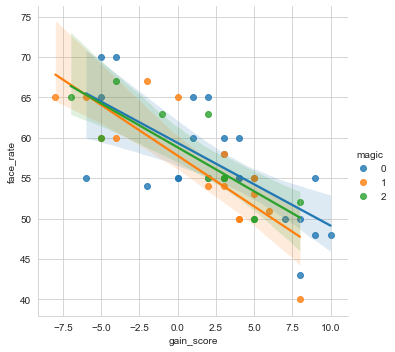

In [30]:
sns.lmplot(data=girls_frame,
                   x='gain_score',y='face_rate',hue='magic')

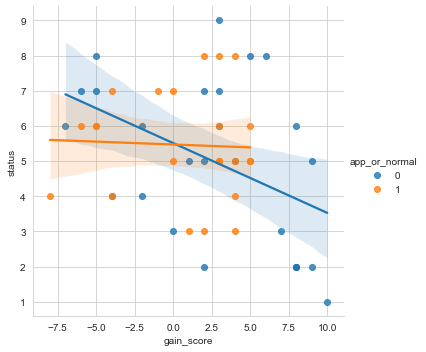

In [16]:
sns.lmplot(data=girls_frame,
                   x='gain_score',y='status',hue='app_or_normal')

In [29]:
girls_frame.sort_values('head_and_body',ascending=False).reset_index().drop(['id','index'],1)

,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_,face+status,face+status+inde,face+edu,face+edu+inde,gain_score
0,2016/10,ゆめ,nanpa,3.0,4.5,1.0,2,5,10,D,0,8,2.0,8,50,3.0,4.0,169,痩せ型,7.5,kid,normal,0,3.703704,11.703704,15.703704,11.703704,15.703704,5
1,2019/09,av,tinder,1.0,3.0,3.0,0,10,5,D,1,8,5.0,5,70,4.0,2.5,169,痩せ型,7.2,open,kid,0,11.111111,19.111111,29.111111,16.111111,26.111111,-5
2,2018/04,平川,normal,3.0,3.0,3.0,0,6,8,D,0,3,2.0,3,65,4.5,4.0,164,痩せ型,7.0,open,normal,1,9.259259,12.259259,16.259259,12.259259,16.259259,2
3,2018/05,ささや,tinder,3.0,3.0,2.0,2,9,2,N,0,6,3.0,6,65,4.5,3.0,167,痩せ型,7.0,kid,closed,0,9.259259,15.259259,21.259259,15.259259,21.259259,-7
4,2020/07,ななこ,tokyo_calender,2.0,3.0,4.0,1,7,5,D,2,6,2.0,6,67,5.0,3.0,164,痩せ型,7.0,open,open,0,10.000000,16.000000,20.000000,16.000000,20.000000,-2
5,2016/10,みつき,normal,2.0,2.0,2.0,0,10,6,D,0,4,1.0,4,70,4.5,2.5,156,痩せ型,6.7,kid,kid,1,11.111111,15.111111,17.111111,15.111111,17.111111,-4
6,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0,9.259259,16.259259,26.259259,16.259259,26.259259,-6
7,2018/10,かばさわ,normal,3.0,4.5,2.0,2,10,9,D,0,7,4.5,8,63,4.0,2.5,160,痩せ型,6.5,open,closed,1,8.518519,15.518519,24.518519,16.518519,25.518519,-1
8,2015/08,ちひろ,normal,3.0,3.0,2.0,0,6,10,D,0,3,2.0,3,55,3.0,2.5,160,痩せ型,6.5,kid,open,1,5.555556,8.555556,12.555556,8.555556,12.555556,4
9,2017/02,さわこ,normal,5.0,4.5,4.0,0,6,10,D,0,4,3.0,3,60,4.0,2.5,160,痩せ型,6.5,kid,kid,1,7.407407,11.407407,17.407407,10.407407,16.407407,4


In [18]:
time_df = girls_frame.sort_values('date',ascending=False).reset_index()
time_df = time_df.drop(['id','index'],1)

In [19]:
time_df

,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_,face+status,face+status+inde,face+edu,face+edu+inde,gain_score
0,2020/08,みか,tokyo_calender,2.0,3.0,2.0,1,8,3,D,0,7,5.0,7,60,3.5,2.0,157,普通,6.3,normal,normal,0,7.407407,14.407407,24.407407,14.407407,24.407407,-5
1,2020/07,ななこ,tokyo_calender,2.0,3.0,4.0,1,7,5,D,2,6,2.0,6,67,5.0,3.0,164,痩せ型,7.0,open,open,0,10.000000,16.000000,20.000000,16.000000,20.000000,-2
2,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0,9.259259,16.259259,26.259259,16.259259,26.259259,-6
3,2020/07,かほさん,tokyo_calender,2.0,3.0,2.0,0,7,10,Ｌ,0,6,3.0,8,60,3.0,2.0,155,痩せ型,6.5,open,normal,0,7.407407,13.407407,19.407407,15.407407,21.407407,3
4,2020/06,おっぱい,tokyo_calender,2.0,3.0,2.0,1,0,8,Ｌ,1,6,4.0,8,40,1.0,2.0,168,太り気味,6.0,open,normal,0,0.000000,6.000000,14.000000,8.000000,16.000000,8
5,2020/06,うさぎ,tokyo_calender,5.0,3.0,3.0,0,0,9,Ｌ,2,5,3.0,6,48,1.0,2.0,157,病的な痩せ型,6.0,open,open,0,2.962963,7.962963,13.962963,8.962963,14.962963,9
6,2020/04,藤波,tokyo_calender,2.0,4.5,5.0,0,2,10,N,2,2,3.0,3,50,3.0,2.0,155,普通,6.3,kid,kid,0,3.703704,5.703704,11.703704,6.703704,12.703704,8
7,2020/03,ちえみ,tokyo_calender,2.0,4.0,3.0,2,7,10,D,1,7,4.0,5,55,4.0,3.5,157,普通,6.3,kid,normal,0,5.555556,12.555556,20.555556,10.555556,18.555556,3
8,2020/03,えみこ,tokyo_calender,3.0,3.5,4.0,0,8,9,D,1,5,2.0,5,65,4.5,3.0,157,普通,6.3,open,normal,0,9.259259,14.259259,18.259259,14.259259,18.259259,1
9,2020/03,ちつね,tokyo_calender,4.0,3.0,3.0,0,2,9,Ｌ,1,3,3.0,9,50,2.0,2.0,155,普通,6.0,open,normal,0,3.703704,6.703704,12.703704,12.703704,18.703704,7


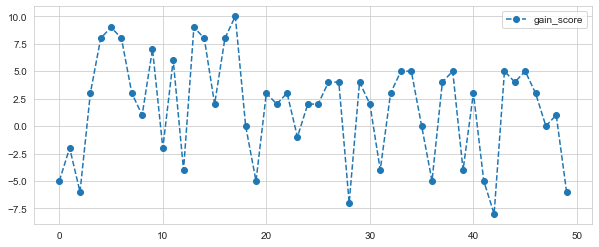

In [20]:
time_df['gain_score'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [21]:
model = LinearRegression()

In [22]:
X_girl = girls_frame.drop(['success','id','name','date','gain_score'],1)
X_girl = X_girl.replace(['D','Ｌ','L','N'],[2,1,1,0])
X_girl = X_girl.replace(['痩せ型','普通','太り気味','病的な痩せ型'],[2,1,0,3])
X_girl = X_girl.replace(['tokyo_calender','tinder','nanpa','normal'],[3,2,1,0])
X_girl = X_girl.replace(['open','kid','closed','normal'],[2,1,0,3])
Y_girl = girls_frame.success

In [23]:
X_girl = girls_frame[['wanted','face+edu+inde','app_or_normal','my_behavior','opps_behavior','height','app_ex','maniac','LorD']]

In [24]:
X_girl.head(1)

,wanted,face+edu+inde,app_or_normal,my_behavior,opps_behavior,height,app_ex,maniac,LorD
0,9,26.259259,0,open,normal,154,1,4.0,D


In [26]:
model.fit(X_girl,Y_girl)

ValueError: could not convert string to float: 'open'

In [ ]:
# 新しいDataFrameを作ります。
coeff_df = DataFrame(X_girl.columns)
coeff_df.columns = ['Features']

#求められた係数を代入します。
coeff_df["Coefficient Estimate"] = pd.Series(model.coef_)

coeff_df

In [ ]:
# 説明変数をX、目的変数をYとして受け取ります。
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_girl,girls_frame.success)

In [ ]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# 推論
pred_train = model.predict(X_train)
pred_test  = model.predict(X_test)

# 分散
np.mean((Y_train - pred_train)**2)
np.mean((Y_test - pred_test)**2)


train = plt.scatter(pred_train, (pred_train-Y_train), c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0, xmin=1.0,xmax= 15)

plt.legend((train,test),('Training','Test'), loc='lower left')
plt.title('Residual plots')
plt.savefig('selected_feature.png')

In [31]:
girls_frame.to_csv('my_loves.csv')